In [34]:
# zad. 1 - kopiowanie plików 

import os
import shutil

files_location = "./pliki/resources/lab2/files"

for found_file in os.listdir(files_location):
    found_file_location = os.path.join(files_location, found_file)
    
    if os.path.isdir(found_file_location):
        continue

    with open(found_file_location, "r") as file_handler:
        desired_dir_name = file_handler.readline().split(" ")[1]
        desired_location = os.path.join(files_location, desired_dir_name)
        
        if not os.path.isdir(desired_location):
            os.mkdir(desired_location)
        
        shutil.copy(found_file_location, desired_location)
        

In [7]:
# zad. 3 - redukcja macierzy

import numpy as np

def reduce(input_array, desired_shape):
    input_rows, input_columns = input_array.shape[0], input_array.shape[1]

    if isinstance(desired_shape, tuple):
        output_rows, output_columns = desired_shape
    else:
        output_rows = desired_shape
        output_columns = desired_shape

    if output_rows > input_rows or output_columns > input_columns:
        print("Tablica wynikowa musi być mniejszego wymiaru niż wejściowa")
        print(f" tablica wejściowa: x: {input_rows}, y: {input_columns}")
        print(f" tablica wyjściowa: x: {output_rows}, y: {output_columns}")
        return

    if isinstance(input_array[0, 0], np.ndarray): 
        output_array = np.empty((output_rows, output_columns, 3))
    else:
        output_array = np.empty((output_rows, output_columns))

    rows_scale_factor = 1 if output_rows == 1 else (input_rows - 1) / (output_rows - 1)
    columns_scale_factor = 1 if output_columns == 1 else (input_columns - 1) / (output_columns - 1)

    for i in range(0, output_rows):
        for j in range(0, output_columns):
            input_row_index = round(i * rows_scale_factor)
            input_column_index = round(j * columns_scale_factor)
            
            neighborhood = [input_array[input_row_index, input_column_index]]
            if input_row_index - 1 >= 0:
                neighborhood.append(
                    input_array[input_row_index - 1, input_column_index]
                )
            if input_row_index + 1 <= input_rows - 1:
                neighborhood.append(
                    input_array[input_row_index + 1, input_column_index]
                )
            if input_column_index - 1 >= 0:
                neighborhood.append(
                    input_array[input_row_index, input_column_index - 1]
                )
            if input_column_index + 1 <= input_columns - 1:
                neighborhood.append(
                    input_array[input_row_index, input_column_index + 1]
                )

            # a bit of hacking for the RGB conversion
            if isinstance(input_array[0, 0], np.ndarray): 
                sum_r = 0
                sum_g = 0
                sum_b = 0
                for n_i in range(0, len(neighborhood) - 1):
                    sum_r += neighborhood[n_i][0]
                    sum_g += neighborhood[n_i][1]
                    sum_b += neighborhood[n_i][2]

                output_array[i, j, 0] = sum_r / len(neighborhood)
                output_array[i, j, 1] = sum_g / len(neighborhood)
                output_array[i, j, 2] = sum_b / len(neighborhood)
            else:
                output_array[i, j] = sum(neighborhood) / len(neighborhood)
    
    return output_array


input_array = np.array(
    [
        [1,2,3,4,5],
        [5,4,3,2,1],
        [1,2,3,4,5],
        [5,4,3,2,1],
        [1,2,3,4,5]
    ]
)
print("# input:")
print(input_array)
print("------------------------------------------------")
print()

print("# spodziewany wynik: błąd - tablica wynikowa nie może być większa")
reduce(input_array, 6)
print("------------------------------------------------")
print()

print("# spodziewany wynik: redukcja do tablicy 3x3")
output_array = reduce(input_array, 3)
print(output_array)
print("------------------------------------------------")
print()

print("# spodziewany wynik: redukcja do tablicy 3x1")
output_array = reduce(input_array, (3, 1))
print(output_array)

# input:
[[1 2 3 4 5]
 [5 4 3 2 1]
 [1 2 3 4 5]
 [5 4 3 2 1]
 [1 2 3 4 5]]
------------------------------------------------

# spodziewany wynik: błąd - tablica wynikowa nie może być większa
Tablica wynikowa musi być mniejszego wymiaru niż wejściowa
 tablica wejściowa: x: 5, y: 5
 tablica wyjściowa: x: 6, y: 6
------------------------------------------------

# spodziewany wynik: redukcja do tablicy 3x3
[[2.66666667 3.         3.33333333]
 [3.25       3.         2.75      ]
 [2.66666667 3.         3.33333333]]
------------------------------------------------

# spodziewany wynik: redukcja do tablicy 3x1
[[2.66666667]
 [3.25      ]
 [2.66666667]]


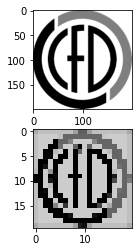

In [8]:
# zad. 4a - skalowanie obrazka

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

orig_img = mpimg.imread("./pliki/resources/lab2/meil.png")
reduced_img = reduce(orig_img, 20)

plt.figure(1)
plt.subplot(211)
plt.imshow(orig_img)

plt.subplot(212)
plt.imshow(reduced_img)

plt.show()

In [52]:
# zad. 4b - ASCII art

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import colorsys

DESIRED_IMAGE_SIZE = 20

orig_img = mpimg.imread("./pliki/resources/lab2/meil.png")
reduced_img = reduce(orig_img, DESIRED_IMAGE_SIZE)

def ascii_art_char(brightness):
    if brightness >= 0.75:
        return " "
    if brightness > 0.6:
        return "|"
    return "8"


ascii_art = ''
ascii_array = []

for i in range(0, DESIRED_IMAGE_SIZE - 1):
    for j in range(0, DESIRED_IMAGE_SIZE - 1):
        _h, _s, v = colorsys.rgb_to_hsv(
            reduced_img[i, j, 0], reduced_img[i, j, 1], reduced_img[i, j, 2]
        )
        ascii_array.append(v)
        ascii_art += ascii_art_char(v)
    ascii_art += '\n'

# print(ascii_array)    
print(ascii_art)

|       |88|       
     |88888888     
    8888    8888   
   888  88 8  888  
  88| 8 88 888 |88 
  88 88 8  8 88 88 
 88 88  8  8  88 88
 88 8   8  8   8 88
|8 88   8  8   8| 8
88 88  888 8   88 8
88 88   8  8   88 8
 8 |8   8  8   8  8
 88 8   8  8   8 88
 88 88  8  8  88 88
  88 88 8  8 88 88 
  888 8 8  888 |88 
   888        888  
    8888    8888   
      88888888     



In [76]:
# zad. 2 - wykres sprężystości

import numpy as np
from numpy.linalg import norm
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from matplotlib import animation

m, l, k = [10, 10, 10]
x1 = [0, 0]
x2 = [-l, 0]
u1 = [0, 50]
u2 = [-30, 30]
endTime=10
nSteps=500
nFrames=100

def equation(Y, t):
    '''
    Equations of motion
    dr = x2 - x1
    m a1 = dr k (1 - l/|dr|)
    m a2 = - dr k (1 - l/|dr|)
    '''
    x1 = Y[:2]
    u1 = Y[2:4]
    x2 = Y[4:6]
    u2 = Y[6:]

    dr = x2-x1

    dY = np.zeros(8)

    if x1[1] < 0 or x2[1] < 0:
        return dY

    dY[2:4] = dr*k/m*(1-l/norm(dr))
    dY[3] -= 9.81
    dY[6:] = -dr*k/m*(1-l/norm(dr))
    dY[7] -= 9.81
    dY[:2] = u1
    dY[4:6] = u2

    return dY

Y0 = np.array([x1,u1,x2,u2]).reshape(8)

Y = odeint(equation, Y0, np.linspace(0, endTime, nSteps))
fig = plt.figure()

plt.plot(Y[:,0], Y[:,1])
plt.plot(Y[:,4], Y[:,5])
p1, = plt.plot(Y0[0],Y0[1], '.', markersize=10, color="blue")
p2, = plt.plot(Y0[4],Y0[5], '.', markersize=10, color="green")
spring, = plt.plot(Y0[4],Y0[5], '-', markersize=10, color="red")

plt.axes().set_aspect('equal', 'datalim')
plt.axes().grid(True)

plt.show()

def anim(frame):
    t = int(len(Y)*float(frame)/nFrames)
    x1 = Y[t,:2]
    x2 = Y[t,4:6]

    p1.set_data(x1)
    p2.set_data(x2)
    spring.set_data([x1[0],x2[0]], [x1[1], x2[1]])

a = animation.FuncAnimation(fig, anim, frames=nFrames, interval=100, repeat=False)
a.save('./simulation.gif', writer='imagemagick', fps=10)